Problem Set 2

Problem 1 - Recursive Variable Step Size Integrator

In [19]:
import numpy as np 
from matplotlib import pyplot as plt

def lorentz(x):
    return 1/(1+x**2)

def square(x):
    return x**2

def expo(x):
    return np.exp(x)

def integrate_step_lazy(fun,x1,x2,tol,count1):
    #print('integrating from ',x1,' to ',x2)
    x=np.linspace(x1,x2,5)
    y=fun(x)
    count1=count1+len(y)
    area1=(x2-x1)*(y[0]+4*y[2]+y[4])/6
    area2=(x2-x1)*( y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12
    myerr=np.abs(area1-area2)
    if myerr<tol:
        return area2,count1
    else:
        xm=0.5*(x1+x2)
        a1,count1=integrate_step_lazy(fun,x1,xm,tol/2,count1)
        a2,count1=integrate_step_lazy(fun,xm,x2,tol/2,count1)
        return a1+a2,count1

#New method adapted from Numerical Recipes 
def trapzd(fun,x1,x2,s,n,count2):
    if n==1:
        s=0.5*(x2-x1)*(fun(x1)+fun(x2))
    else: #add points between endpoints
        t=int(2**(n-2))
        tr=t*1.0
        d=(x2-x1)/tr #point spacing
        x=x1+0.5*d
        sum=0.0
        for j in range(t):
            sum=sum+fun(x)
            count2=count2+1
            x=x+d
        s=0.5*(s+(x2-x1)*sum/tr)
    return s,count2

def qsimp(fun,x1,x2,tol,stepmax):
    ost=-1.0e30
    os=-1.0e30
    st=0.0
    count2=0
    for k in range(1,stepmax+1):
        st,count2=trapzd(fun,x1,x2,st,k,count2)
        s=(4*st-ost)/3 #From cancelation result PS1.1
        if (np.abs(s-os)<tol) or (s==0 and os==0):
            return s,count2
        os=s
        ost=st
    return 

#Lorentzian
print('Integrating a Lorentzian from -10 to 10:')
count1=0
integ1,count1=integrate_step_lazy(lorentz,-10,10,0.001,count1)
print('The lazy integrator found a value of', integ1,'and made',count1,'function calls.')

integ2,count2=qsimp(lorentz,-10,10,0.001,20)
if integ2==None:
    print('Too many steps in new integration.')
else:
    print('The new integrator found a value of', integ2,'and made',count2,'function calls.')
    print('The difference in integration results was',np.abs(integ1-integ2),'.')

#Exponential
print('\nIntegrating an exponential from -1 to 1:')
count1=0
integ1,count1=integrate_step_lazy(expo,-1,1,0.001,count1)
print('The lazy integrator found a value of', integ1,'and made',count1,'function calls.')

integ2,count2=qsimp(expo,-1,1,0.001,20)
if integ2==None:
    print('Too many steps in new integration.')
else:
    print('The new integrator found a value of', integ2,'and made',count2,'function calls.')
    print('The difference in integration results was',np.abs(integ1-integ2),'.')

#Parabola
print('\nIntegrating a parabola from -10 to 10:')
count1=0
integ1,count1=integrate_step_lazy(square,-10,10,0.001,count1)
print('The lazy integrator found a value of', integ1,'and made',count1,'function calls.')

integ2,count2=qsimp(square,-10,10,0.001,20)
if integ2==None:
    print('Too many steps in new integration.')
else:
    print('The new integrator found a value of', integ2,'and made',count2,'function calls.')
    print('The difference in integration results was',np.abs(integ1-integ2),'.')


Integrating a Lorentzian from -10 to 10:
The lazy integrator found a value of 2.9422692844045413 and made 215 function calls.
The new integrator found a value of 2.9422553432146175 and made 127 function calls.
The difference in integration results was 1.394118992381621e-05 .

Integrating an exponential from -1 to 1:
The lazy integrator found a value of 2.350418330020429 and made 25 function calls.
The new integrator found a value of 2.35045301724228 and made 7 function calls.
The difference in integration results was 3.4687221850848715e-05 .

Integrating a parabola from -10 to 10:
The lazy integrator found a value of 666.6666666666666 and made 5 function calls.
The new integrator found a value of 666.6666666666666 and made 3 function calls.
The difference in integration results was 0.0 .


Problem 2 - Chebychev Polynomial Fit

The order of the truncated Chebyshev Polynomial is 10 to an accuracy of 3.167244904689077e-07 .
6.302009825718456e-10 6.302009984049046e-10 6.302009825718456e-10

The maximum error in the fits is 1.1690136636488546e-09 for Chebyshev, and 2.254424202874361e-09 for polynomial.
The average error in the fits is 7.066303003367787e-10 for Chebyshev, and 6.302009825718456e-10 for polynomial.



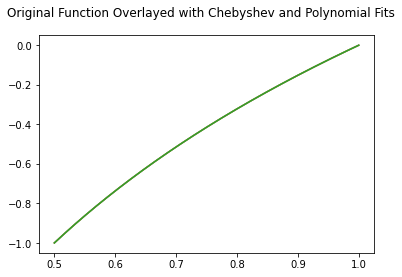

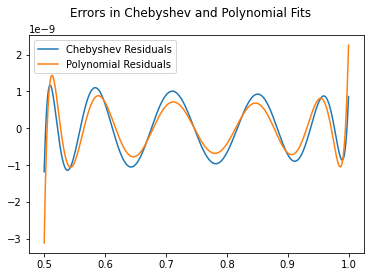

In [498]:
import numpy as np 
from matplotlib import pyplot as plt

def real_fun(x):
    return np.log2(x)

def cheb_fit(fun,xmin,xmax,ord):
    x=np.linspace(xmin,xmax,ord+1)
    f=fun(x)
    #change of variables to go from -1 to 1
    xscale=x-x.min()
    xscale=xscale/(xscale.max())
    xscale=2*xscale-1
    mat=np.zeros([ord+1,ord+1])
    mat[:,0]=1
    mat[:,1]=xscale
    for i in range(1,ord):
        mat[:,i+1]=2*xscale*mat[:,i]-mat[:,i-1] 
    coeffs=np.linalg.pinv(mat)@f
    return coeffs

def cheb_eval(xx,coeffs,m):
    mat=np.zeros([len(xx),m+1])
    yy=[0.0]*len(xx)
    mat[:,0]=1
    mat[:,1]=xx
    for i in range(1,m):
        mat[:,i+1]=(2*xx*mat[:,i]-mat[:,i-1])
    matnew=(mat*coeffs[:m+1])
    for j in range(len(xx)):
        yy[j]=np.sum(matnew[j])
    return yy

x=np.linspace(0.5,1,500)
y=real_fun(x)

#rescale x to go from -1 to 1
xscale=x-x.min()
xscale=xscale/(xscale.max())
xscale=2*xscale-1

#Find Order and Output of Chebyshev Fit
maxorder=20
tol=1e-6
coeffs=cheb_fit(real_fun,0.5,1,maxorder)
for j in range(2,maxorder):
    yy=cheb_eval(xscale,coeffs,j)
    err=np.sum(np.abs(y-yy)) #difference between actual values and fit
    if err>tol: continue
    else:
        order=j
        yyout=yy
        break

print('The order of the truncated Chebyshev Polynomial is',order,'to an accuracy of',err,'.')

#Polynomial Fit Using Numpy Functions
polycoeff=np.polynomial.legendre.legfit(x,y,order)
polyfit=np.polynomial.legendre.legval(x,polycoeff)

#First Figure
plt.figure(1)
plt.suptitle('Original Function Overlayed with Chebyshev and Polynomial Fits')
plt.plot(x,y)
plt.plot(x,yyout)
plt.plot(x,polyfit)
plt.savefig('Chebyshev_fit.png')

#Error Calculations
errorCheb=y-yyout
errorPoly=y-polyfit
errorChebRMS=np.std(errorCheb)
errorPolyRMS=np.std(errorPoly)
maxCheb=np.max(errorCheb)
maxPoly=np.max(errorPoly)

print(errorPolyRMS,errorPolyRMS2,errorPolyRMS3)

print('\nThe maximum error in the fits is',maxCheb,'for Chebyshev, and',maxPoly,'for polynomial.')
print('The average error in the fits is',errorChebRMS,'for Chebyshev, and',errorPolyRMS,'for polynomial.\n')

#Second Figure
plt.figure(2)
plt.suptitle('Errors in Chebyshev and Polynomial Fits')
plt.plot(x,errorCheb,label="Chebyshev Residuals")
plt.plot(x,errorPoly,label='Polynomial Residuals')
plt.legend()
plt.savefig('ChebyshevError.png')

plt.show()




As expected, the truncated Chebyshev fit has a smaller maximum error, but a larger average error than the Legendre polynomial fit. 

Problem 3 - Radioactive Decay ODE

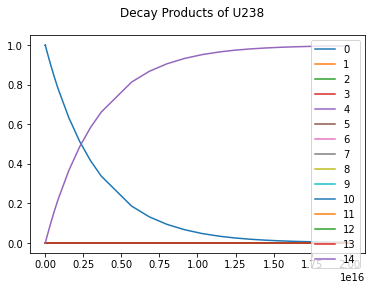

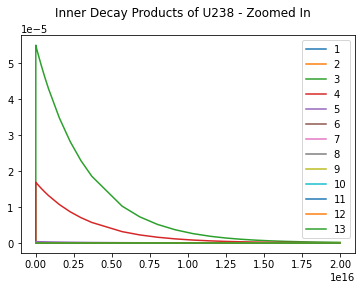

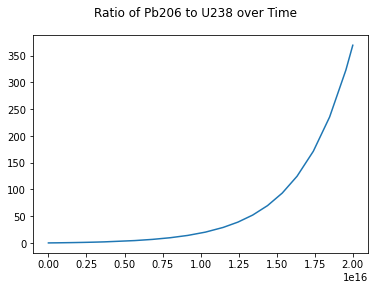

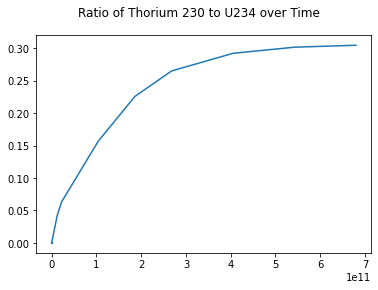

In [488]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
import time

#Decay constant array in 1/minutes - from chart on powerpoint
decay_const=[np.log(2)/2.3484e15,np.log(2)/34704,np.log(2)/402,np.log(2)/1.29035e11,np.log(2)/3.962e10,np.log(2)/8.4096e8,np.log(2)/5505.84,np.log(2)/3.10,np.log(2)/26.8,np.log(2)/19.9,np.log(2)/2.738e-6,np.log(2)/1.1721e7,np.log(2)/2635884,np.log(2)/199261.44]

def fun(x,y,half_life= decay_const):
    #m-stage radioactive decay
    dydx=np.zeros(len(half_life)+1)
    m=len(half_life)
    dydx[0]=-y[0]*half_life[0]
    for i in range(1,m):
        dydx[i]=y[i-1]*half_life[i-1]-y[i]*half_life[i]
    dydx[m]=y[m-1]*half_life[m-1]
    return dydx


y0=np.asarray([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #length=number of decay steps 
#x=time in minutes
x0=0
x1=2e16
#Use BDF to solve because it is an impicit method (and this is a stiff equation) 
#and it gives higher resolution solution then Radau
ans_stiff=integrate.solve_ivp(fun,[x0,x1],y0,method='BDF') 

plt.figure(1)
plt.suptitle('Decay Products of U238')
for i in range(15):
    plt.plot(ans_stiff.t,ans_stiff.y[i],label=i)
plt.legend()
plt.savefig('AllDecayProducts.png')

plt.figure(2)
plt.suptitle('Inner Decay Products of U238 - Zoomed In')
for i in range(1,14):
    plt.plot(ans_stiff.t,ans_stiff.y[i],label=i)
plt.legend()
plt.savefig('InnerDecayProducts.png')

plt.figure(3)
plt.suptitle('Ratio of Pb206 to U238 over Time')
ratio1=ans_stiff.y[-1]/ans_stiff.y[0]
plt.plot(ans_stiff.t[:],ratio1[:])
plt.savefig('Pb206vU238.png')

plt.figure(5)
plt.suptitle('Ratio of Thorium 230 to U234 over Time')
ratio2=ans_stiff.y[4]/ans_stiff.y[3]
plt.plot(ans_stiff.t[:37],ratio2[:37])
plt.savefig('Th230vU234.png')




(a) For this problem, I would use an implicit solver, since the decay constants vary so widely leading to a stiff equation that would take to long to solve explicitly. I specifically used a backward differentiation formula method because it automatically provides more points/higher resolution than the Radau method.

(b) The ratio of Pb206 to U238 is an exponential function over time. This makes sense if we approximate U238 decaying immediately to lead. As seen in the calculation below, we expect that the ratio will increase as 1+e^(lambda*t) where lambda is the decay constant, or ln(2)/halflife. 

![alt text](P3calc.png)